In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder


In [3]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop("customerID", axis=1, inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.shape

(7043, 20)

In [6]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df = df[df["TotalCharges"] != " "]

In [9]:
df.shape

(7032, 20)

In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
columns = ['TechSupport', 'DeviceProtection', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV','OnlineBackup']


df[columns] = df[columns].replace({'No internet service': 'No'})
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

In [16]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [17]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [19]:
for col in categorical_cols:
    print(f"{df[col].value_counts()}\n{'-'*30}")

gender
Male      3549
Female    3483
Name: count, dtype: int64
------------------------------
Partner
No     3639
Yes    3393
Name: count, dtype: int64
------------------------------
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
------------------------------
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
------------------------------
MultipleLines
No     4065
Yes    2967
Name: count, dtype: int64
------------------------------
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
------------------------------
OnlineSecurity
No     5017
Yes    2015
Name: count, dtype: int64
------------------------------
OnlineBackup
No     4607
Yes    2425
Name: count, dtype: int64
------------------------------
DeviceProtection
No     4614
Yes    2418
Name: count, dtype: int64
------------------------------
TechSupport
No     4992
Yes    2040
Name: count, dtype: int64
------------------------------
StreamingTV
No     432

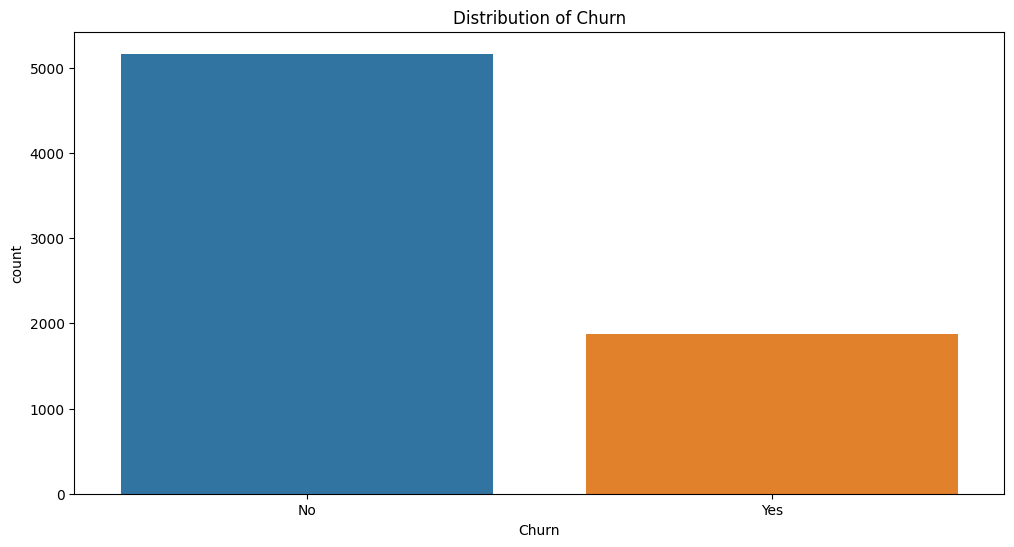

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Churn", data=df)
plt.title("Distribution of Churn")
plt.show()


In [21]:
churn_counts = df["Churn"].value_counts()

churn_percentage = (churn_counts / len(df)) * 100

print(f"Number of customers who churned: {churn_counts['Yes']}")
print(f"Number of customers who stayed: {churn_counts['No']}")
print(f"Churn percentage: {churn_percentage['Yes']:.2f}%")


Number of customers who churned: 1869
Number of customers who stayed: 5163
Churn percentage: 26.58%


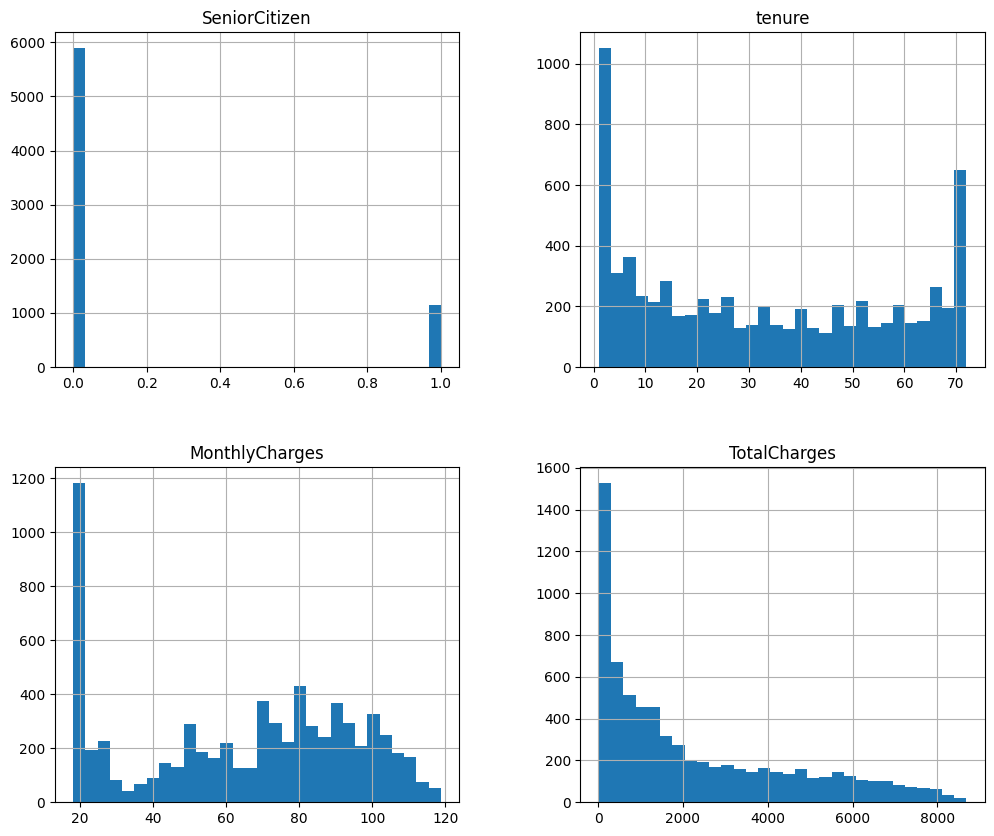

In [22]:
df.hist(figsize=(12, 10), bins=30)
plt.show()


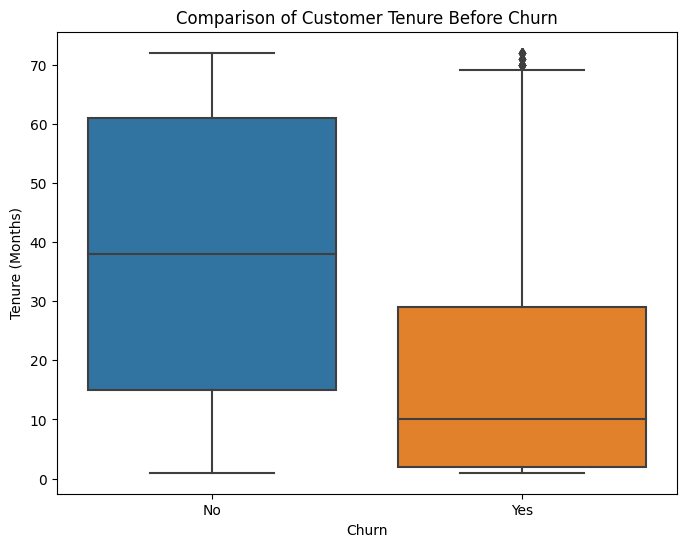

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Comparison of Customer Tenure Before Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()

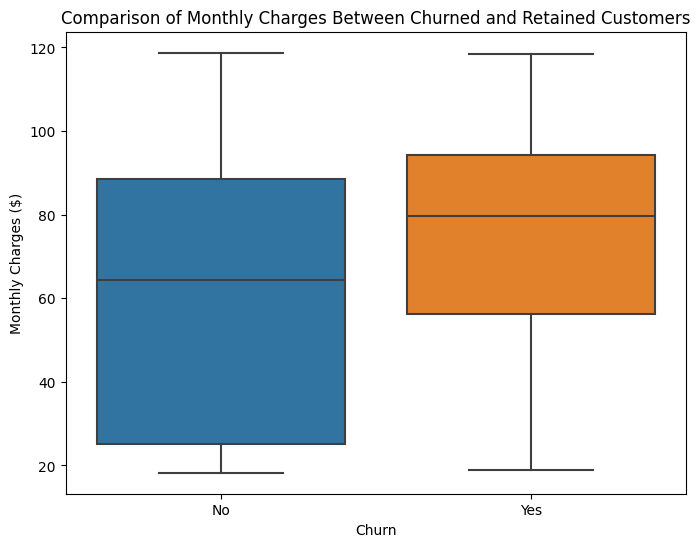

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Comparison of Monthly Charges Between Churned and Retained Customers")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges ($)")
plt.show()


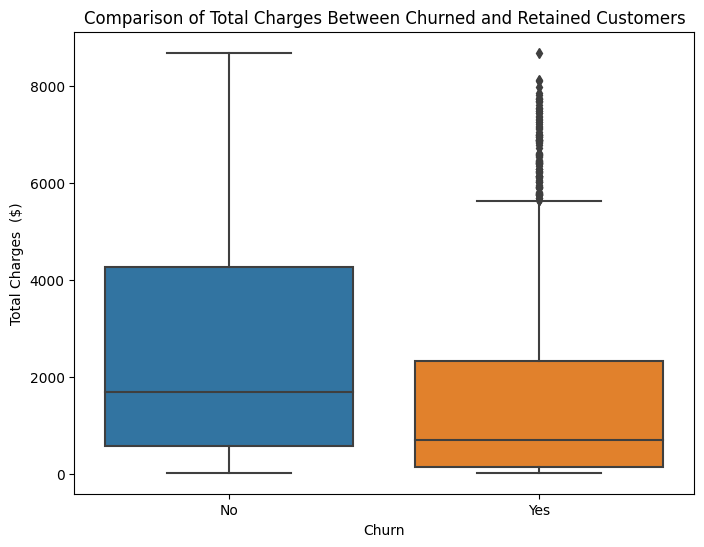

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Comparison of Total Charges Between Churned and Retained Customers")
plt.xlabel("Churn")
plt.ylabel("Total Charges  ($)")
plt.show()


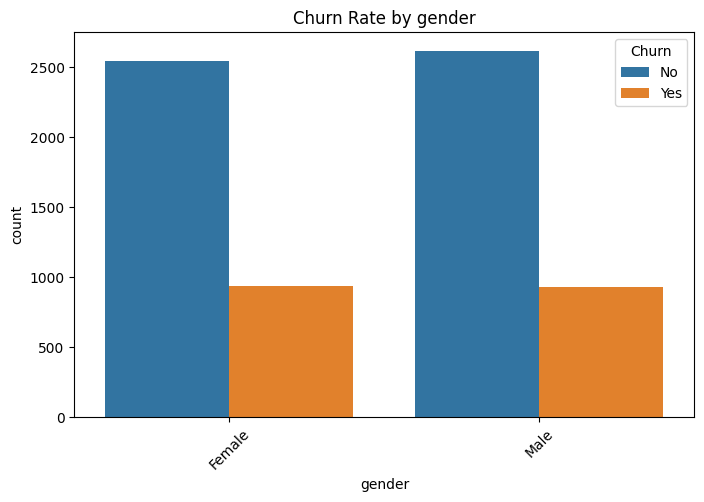

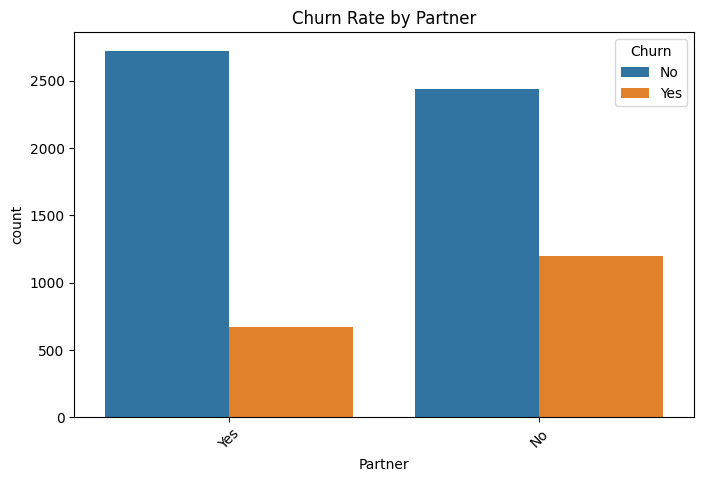

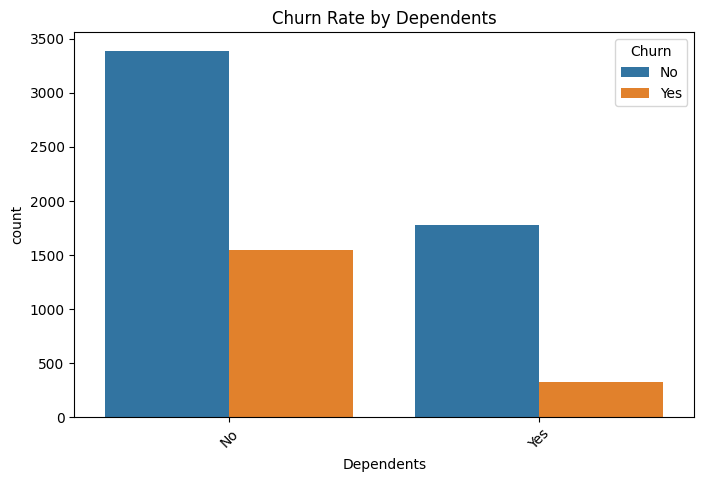

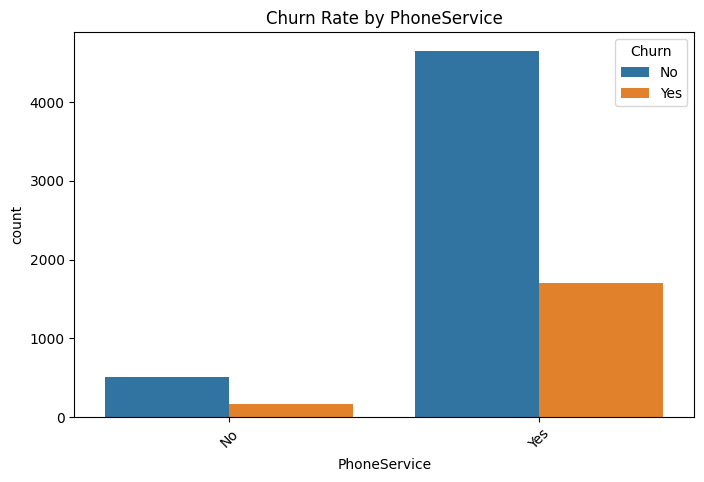

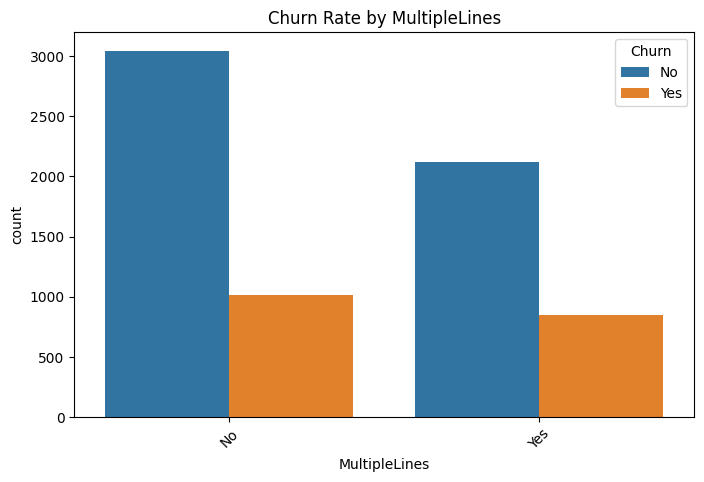

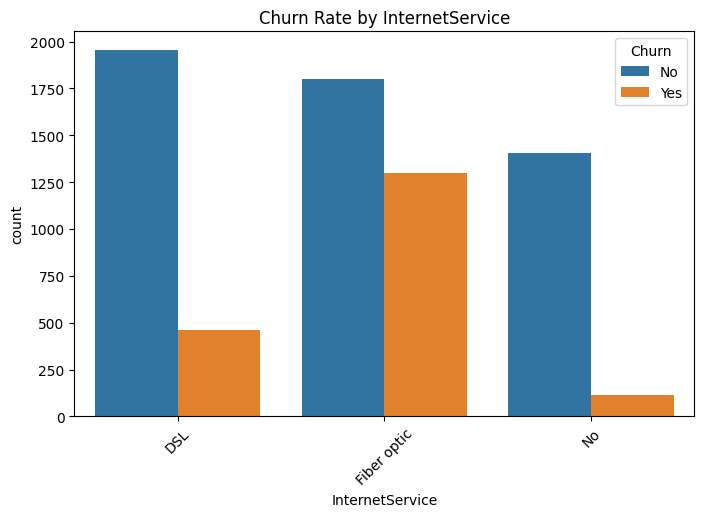

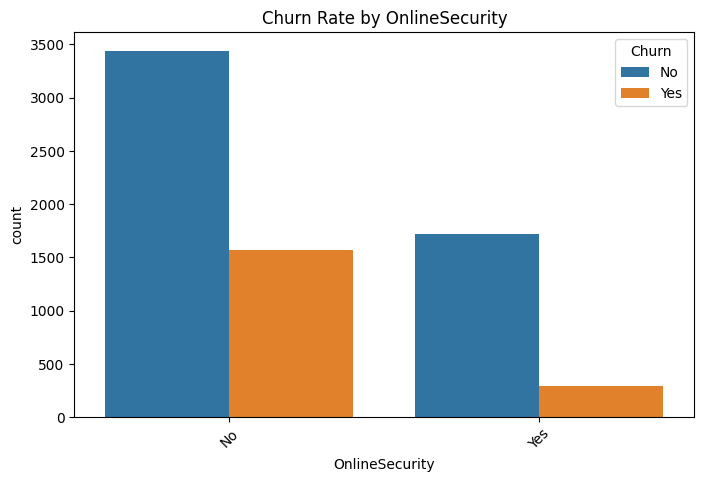

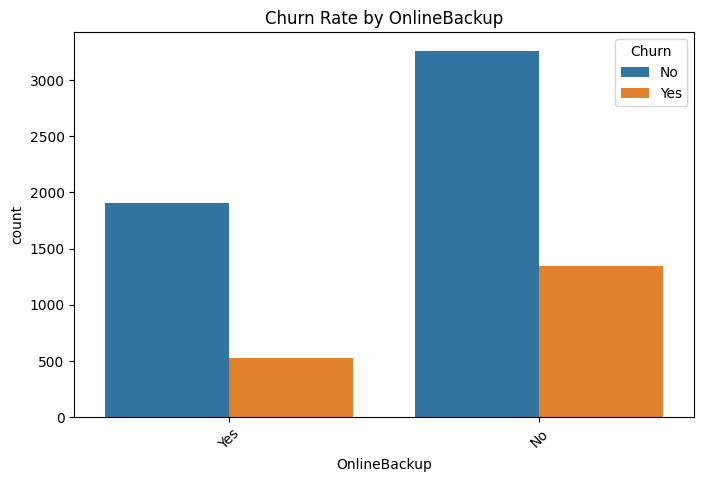

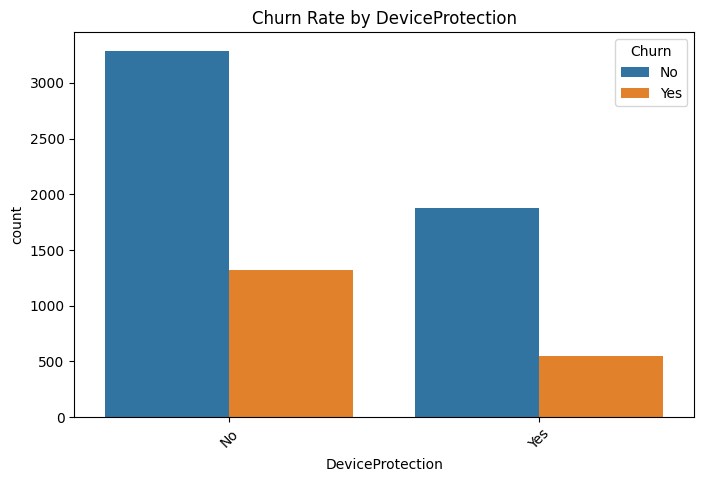

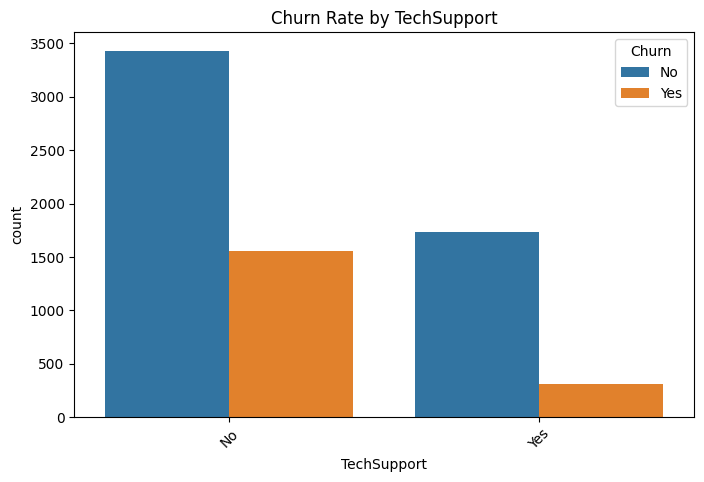

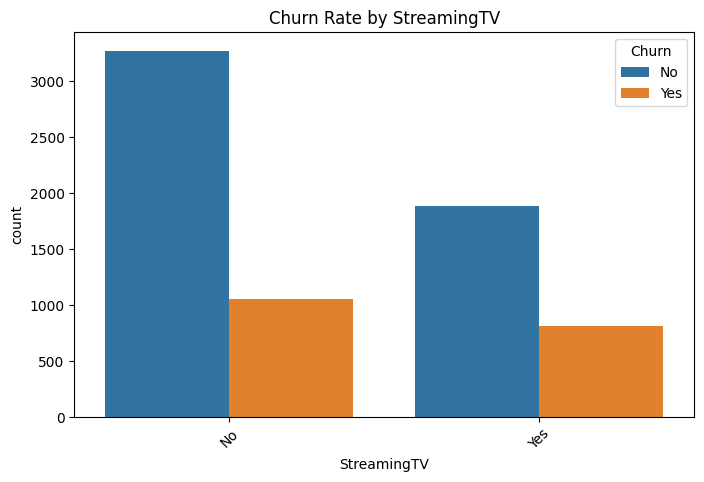

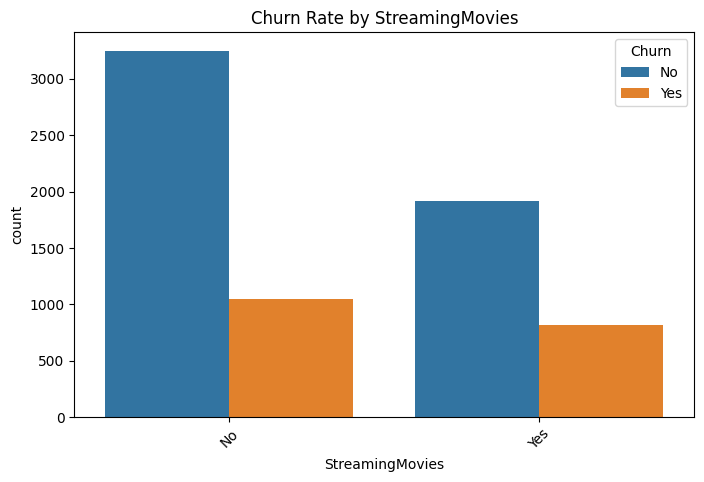

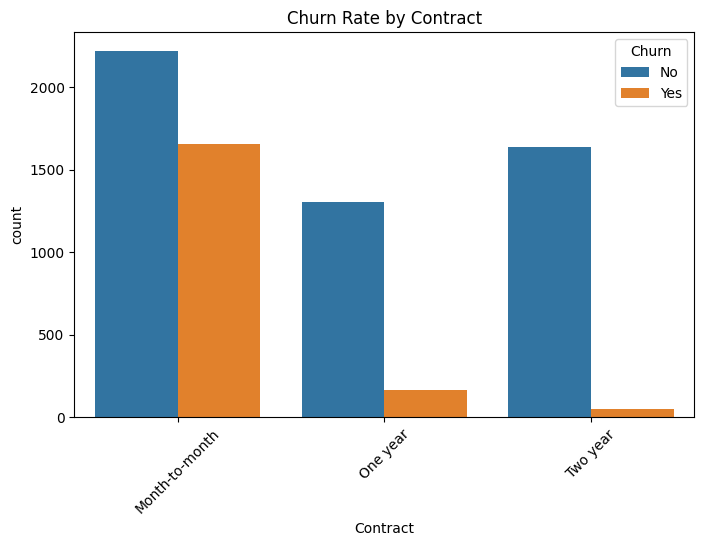

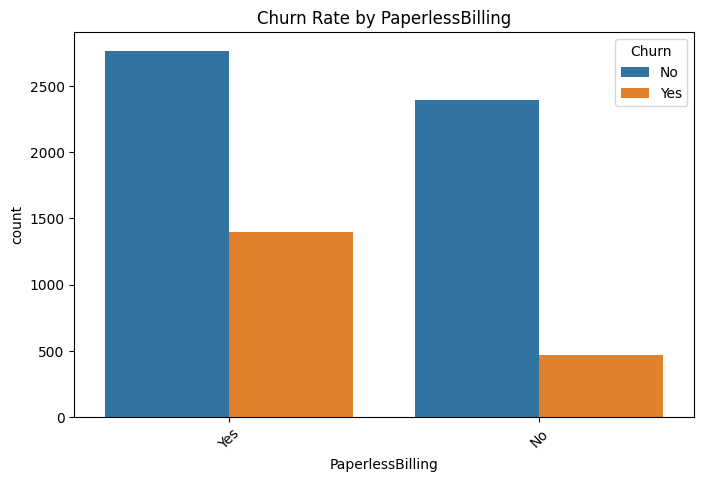

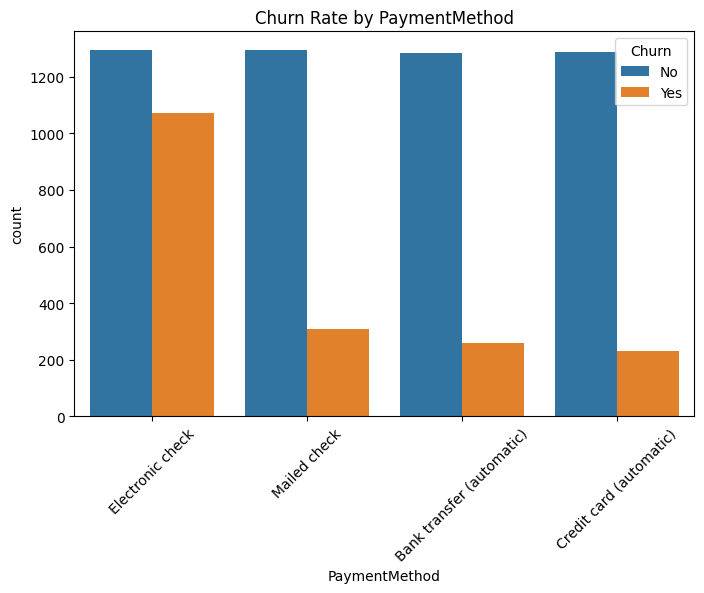

In [26]:

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != "Churn":
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, hue="Churn", data=df)
        plt.title(f"Churn Rate by {col}")
        plt.xticks(rotation=45)
        plt.show()


# Data Preprocessing

In [27]:
num_cols = df.select_dtypes(include=[np.number])

In [28]:
num_cols

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


## handle Outlier

In [29]:
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [30]:
df = df[~((num_cols < lower_bound) | (num_cols > upper_bound)).any(axis=1)]
print(f"Dataset shape after removing outliers: {df.shape}")

Dataset shape after removing outliers: (5890, 20)


## Data Encoding

In [31]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [32]:
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1274,0,0,1,1,62,1,1,1,1,0,0,0,1,1,2,1,0,101.15,6638.35,0
2814,0,0,1,1,62,0,0,0,1,1,0,1,1,0,2,0,0,48.70,3008.55,0
6088,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,2,55.40,55.40,1
866,1,0,1,0,62,0,0,0,0,0,0,1,1,0,2,1,0,39.00,2337.45,0
6922,1,0,0,0,3,1,0,1,0,1,0,0,0,0,0,0,1,74.45,221.10,0
6472,0,0,1,1,60,1,1,1,1,1,0,0,1,0,1,0,0,94.15,5811.80,0
1551,1,0,0,0,22,1,1,2,0,0,0,0,0,0,2,0,3,25.25,566.50,0
4583,0,0,1,0,71,1,1,0,1,1,1,1,1,1,2,0,2,90.10,6310.90,0
6970,1,0,0,0,4,1,1,1,0,0,0,0,0,0,0,1,2,74.35,265.35,1
1301,0,0,1,1,66,1,0,0,1,1,0,1,0,0,2,1,1,58.20,3810.80,0


In [33]:
X = df.drop(columns=['Churn'])
y = df['Churn']


In [34]:
print("Before SMOTE:", Counter(y))

Before SMOTE: Counter({0: 4497, 1: 1393})


In [35]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

print("After SMOTE:", Counter(y))


After SMOTE: Counter({0: 4497, 1: 4497})


# Split data Train %80, Test %20

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


Training Set: (7195, 19), Test Set: (1799, 19)


In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and Evaluate Models

In [38]:
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC()
}

for name, model in models.items():
    print(f"\n#Training {name}...")
    

    model.fit(X_train, y_train)
    

    y_pred = model.predict(X_test)
    

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))
    


#Training Logistic Regression...
Accuracy: 81.21%
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       900
           1       0.79      0.85      0.82       899

    accuracy                           0.81      1799
   macro avg       0.81      0.81      0.81      1799
weighted avg       0.81      0.81      0.81      1799


#Training Decision Tree...
Accuracy: 78.71%
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       900
           1       0.78      0.80      0.79       899

    accuracy                           0.79      1799
   macro avg       0.79      0.79      0.79      1799
weighted avg       0.79      0.79      0.79      1799


#Training Random Forest...
Accuracy: 84.60%
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       900
           1       0.84      0.86      0.85       899

    accuracy                           0.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


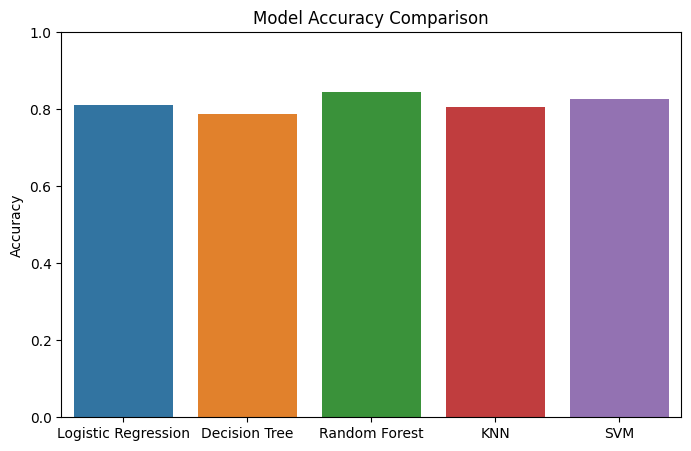

In [39]:
model_accuracies = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    model_accuracies[name] = accuracy_score(y_test, y_pred)


plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


# Fine Tuning Best Model

In [40]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [41]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [42]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate Model


In [43]:
print("Best Parameters:", grid_search.best_params_)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 85.16%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       900
           1       0.84      0.86      0.85       899

    accuracy                           0.85      1799
   macro avg       0.85      0.85      0.85      1799
weighted avg       0.85      0.85      0.85      1799



# ANN Models

In [44]:
model1 = Sequential([
     Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  
     Dense(16, activation='relu'),  
     Dense(1, activation='sigmoid')  
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=50, verbose=1, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6923 - loss: 0.5808 - val_accuracy: 0.8032 - val_loss: 0.4154
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 0.4210 - val_accuracy: 0.8071 - val_loss: 0.4016
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8146 - loss: 0.3973 - val_accuracy: 0.8121 - val_loss: 0.3934
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8176 - loss: 0.3883 - val_accuracy: 0.8143 - val_loss: 0.3908
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8248 - loss: 0.3810 - val_accuracy: 0.8132 - val_loss: 0.3907
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8286 - loss: 0.3802 - val_accuracy: 0.8116 - val_loss: 0.3852
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8293 - loss: 0.3773 - val_accuracy: 0.8082 - val_loss: 0.3835
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8290 - loss: 0.3708 - val_accuracy: 0.8288 - val_

In [45]:
model2 = Sequential([
     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  
     Dense(32, activation='relu'),  
     Dense(16, activation='relu'),  
     Dense(1, activation='sigmoid')  
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit( X_train, y_train, epochs=50, verbose=1, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7580 - loss: 0.5335 - val_accuracy: 0.8066 - val_loss: 0.4104
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8257 - loss: 0.3833 - val_accuracy: 0.8221 - val_loss: 0.3953
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8299 - loss: 0.3777 - val_accuracy: 0.8149 - val_loss: 0.3928
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8310 - loss: 0.3744 - val_accuracy: 0.8299 - val_loss: 0.3898
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8394 - loss: 0.3581 - val_accuracy: 0.8232 - val_loss: 0.3801
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8405 - loss: 0.3496 - val_accuracy: 0.8327 - val_loss: 0.3729
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8356 - loss: 0.3480 - val_accuracy: 0.8282 - val_loss: 0.3745
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8420 - loss: 0.3456 - val_accuracy: 0.

In [46]:
model3 = Sequential([
     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  
     Dropout(0.3),
     Dense(32, activation='relu'),  
     Dropout(0.3),  
     Dense(16, activation='relu'),  
     Dense(1, activation='sigmoid')  
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=50, verbose=1, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6789 - loss: 0.6010 - val_accuracy: 0.7977 - val_loss: 0.4151
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7864 - loss: 0.4549 - val_accuracy: 0.8049 - val_loss: 0.4012
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8062 - loss: 0.4218 - val_accuracy: 0.8121 - val_loss: 0.3965
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8201 - loss: 0.4043 - val_accuracy: 0.8105 - val_loss: 0.3927
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8212 - loss: 0.4031 - val_accuracy: 0.8205 - val_loss: 0.3898
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8192 - loss: 0.3949 - val_accuracy: 0.8232 - val_loss: 0.3853
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8259 - loss: 0.3865 - val_accuracy: 0.8288 - val_loss: 0.3815
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8296 - loss: 0.3858 - val_accuracy: 0.

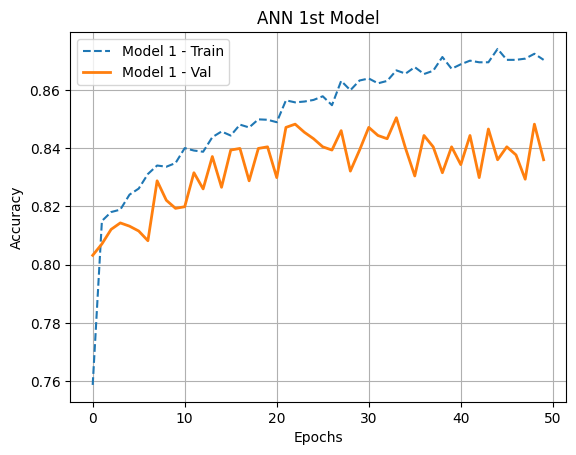

In [47]:
acc1 = history1.history['val_accuracy'][-1]
plt.plot(history1.history['accuracy'], label='Model 1 - Train', linestyle='dashed')
plt.plot(history1.history['val_accuracy'], label='Model 1 - Val', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ANN 1st Model")
plt.legend()
plt.grid()
plt.show()


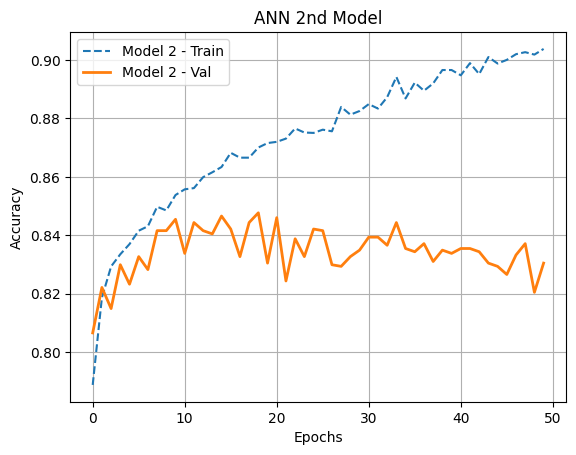

In [48]:
acc2 = history2.history['val_accuracy'][-1]
plt.plot(history2.history['accuracy'], label='Model 2 - Train', linestyle='dashed')
plt.plot(history2.history['val_accuracy'], label='Model 2 - Val', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ANN 2nd Model")
plt.legend()
plt.grid()
plt.show()


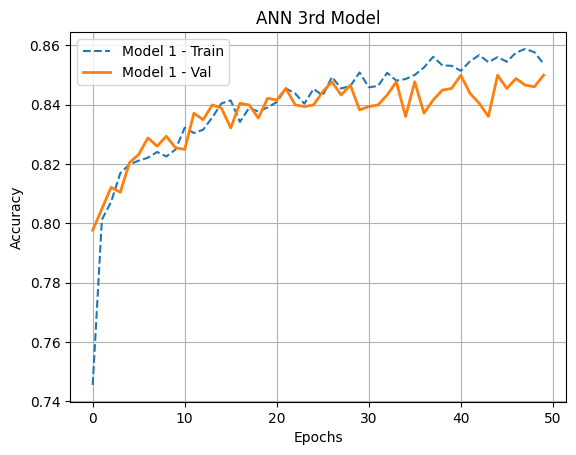

In [49]:
acc3 = history3.history['val_accuracy'][-1]
plt.plot(history3.history['accuracy'], label='Model 1 - Train', linestyle='dashed')
plt.plot(history3.history['val_accuracy'], label='Model 1 - Val', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ANN 3rd Model")
plt.legend()
plt.grid()
plt.show()


Model 1 Validation Accuracy: 83.60%
Model 2 Validation Accuracy: 83.05%
Model 3 Validation Accuracy: 84.99%


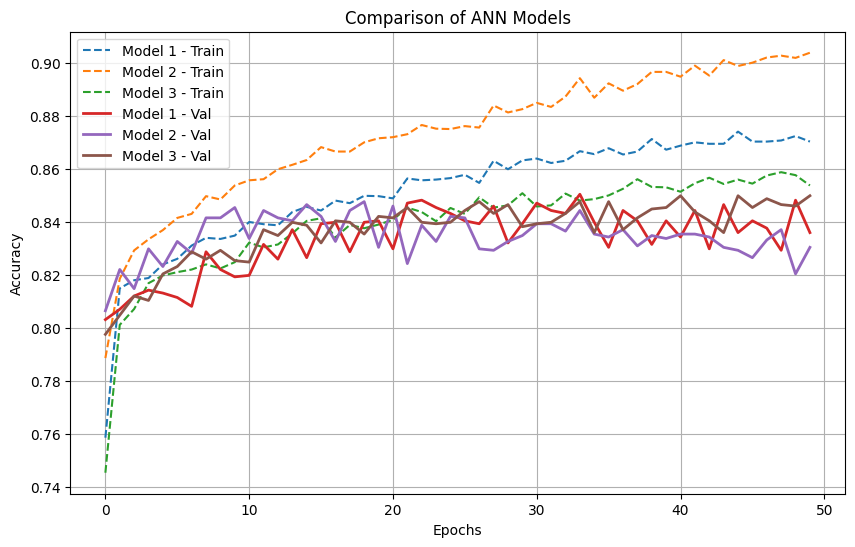

In [50]:
acc1 = history1.history['val_accuracy'][-1]
acc2 = history2.history['val_accuracy'][-1]
acc3 = history3.history['val_accuracy'][-1]
print(f"Model 1 Validation Accuracy: {acc1 * 100:.2f}%")
print(f"Model 2 Validation Accuracy: {acc2 * 100:.2f}%")
print(f"Model 3 Validation Accuracy: {acc3 * 100:.2f}%")

plt.figure(figsize=(10, 6))


plt.plot(history1.history['accuracy'], label='Model 1 - Train', linestyle='dashed')
plt.plot(history2.history['accuracy'], label='Model 2 - Train', linestyle='dashed')
plt.plot(history3.history['accuracy'], label='Model 3 - Train', linestyle='dashed')


plt.plot(history1.history['val_accuracy'], label='Model 1 - Val', linewidth=2)
plt.plot(history2.history['val_accuracy'], label='Model 2 - Val', linewidth=2)
plt.plot(history3.history['val_accuracy'], label='Model 3 - Val', linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Comparison of ANN Models")
plt.legend()
plt.grid()
plt.show()


# Comparison of Model Accuracies

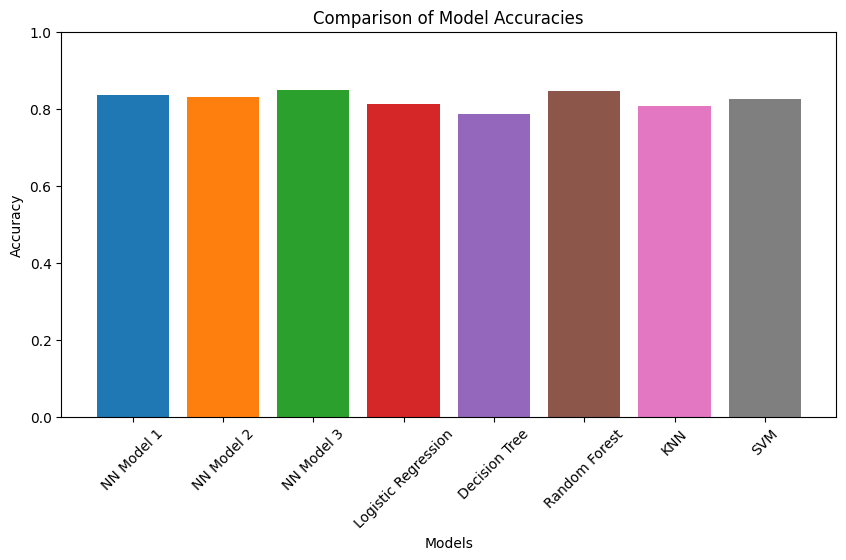

In [51]:

accuracies = {
    "NN Model 1": acc1,
    "NN Model 2": acc2,
    "NN Model 3": acc3,
    **model_accuracies 
}

plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color = ['#1f77b4',  
          '#ff7f0e',
          '#2ca02c',
          '#d62728', 
          '#9467bd',
          '#8c564b',
          '#e377c2', 
          '#7f7f7f'] 
       )
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()
